In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
import time
import re
import json
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
url = "https://genshin-info.ru/wiki/personazhi/"
driver.get(url)

driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
name_list = []
index_character_list = []
poster_list = []
hero_list = []
url_list = []
group_list = []
name_value = "Геншин Импакт"
group_value = "Игры\Аниме"
src = "https://genshin-info.ru"
image_src = "https://genshin-info.ru/upload/resize_cache/iblock/60e/im9iqhbj3momcdaafcajp91ic12mrjpt/781_390_1d7a58ff99b324185ccb5ad5dfbdb5e85/Snimok-ekrana-_967_.png"

characters = driver.find_elements(By.CLASS_NAME, "itemList__item")

for index, character in enumerate(characters, start=1):
    index_character_list.append(index)
    name_list.append(name_value)
    poster_list.append(image_src)
    hero = character.find_element(By.CLASS_NAME, "itemcard__name").text
    hero_list.append(hero)
    url = character.find_element(By.CLASS_NAME, "itemcard__img img").get_attribute("data-src")
    url_list.append(src+url)
    group_list.append(group_value)
driver.quit()

In [8]:
hero_list = ['Путешественник\путешественница' if hero == ' ' else hero for hero in hero_list]
print(len(name_list))
print(len(poster_list))
print(hero_list)
print(url_list)
print(len(group_list))

79
79
['Фурина', 'Шарлотта', 'Ризли', 'Нёвиллет', 'Лини', 'Путешественник\\путешественница', 'Фремине', 'Линетт', 'Кирара', 'Бай Чжу', 'Кавех', 'Мика', 'Дэхья', 'Аль-Хайтам', 'Яо Яо', 'Странник', 'Фарузан', 'Лайла', 'Нахида', 'Нилу', 'Сайно', 'Кандакия', 'Дори', 'Тигнари', 'Коллеи', 'Путешественник\\путешественница', 'Хэйдзо', 'Синобу', 'Е Лань', 'Аято', 'Яэ Мико', 'Шэнь Хэ', 'Юнь Цзинь', 'Итто', 'Горо', 'Тома', 'Кокоми', 'Райдэн', 'Элой', 'Сара', 'Ёимия', 'Саю', 'Путешественник\\путешественница', 'Аяка', 'Кадзуха', 'Эола', 'Янь Фэй', 'Розария', 'Ху Тао', 'Сяо', 'Гань Юй', 'Альбедо', 'Чжун Ли', 'Синь Янь', 'Тарталья', 'Диона', 'Кли', 'Венти', 'Ци Ци', 'Мона', 'Кэ Цин', 'Дилюк', 'Джинн', 'Эмбер', 'Чун Юнь', 'Фишль', 'Сян Лин', 'Син Цю', 'Сахароза', 'Рэйзор', 'Ноэлль', 'Нин Гуан', 'Лиза', 'Кэйа', 'Бэй Доу', 'Беннет', 'Барбара', 'Путешественник\\путешественница', 'Путешественник\\путешественница']
['https://genshin-info.ru/upload/resize_cache/iblock/d5e/e2zf9f1pk8r3j6ope30ce3yi9xmle5vd/20

In [9]:
import pandas as pd

df_existing = pd.read_csv('data.csv')

last_index = df_existing['index'].max()
last_index_world = df_existing['index_world'].max()

data = {
    'name': name_list,
    'poster': poster_list,
    'hero': hero_list,
    'url': url_list,
    'group': group_list,
}

df_new = pd.DataFrame(data)

df_new['index'] = range(last_index + 1, last_index + len(df_new) + 1)
df_new['index_world'] = last_index_world + 1
df_new['index_character'] = range(len(df_new))

df_combined = pd.concat([df_existing, df_new], ignore_index=True)

df_combined.to_csv('data.csv', index=False)

In [10]:
df = pd.read_csv('data.csv')
df.tail(79)

,Unnamed: 0,index,index_character,index_world,name,poster,hero,url,group,Unnamed: 8,url_info,description
2544,NaN,2644,0,37,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Фурина,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
2545,NaN,2645,1,37,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Шарлотта,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
2546,NaN,2646,2,37,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Ризли,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
2547,NaN,2647,3,37,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Нёвиллет,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
2548,NaN,2648,4,37,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Лини,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2618,NaN,2718,74,37,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Бэй Доу,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
2619,NaN,2719,75,37,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Беннет,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
2620,NaN,2720,76,37,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Барбара,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN
2621,NaN,2721,77,37,Геншин Импакт,https://genshin-info.ru/upload/resize_cache/ib...,Путешественник\путешественница,https://genshin-info.ru/upload/resize_cache/ib...,Игры\Аниме,NaN,NaN,NaN


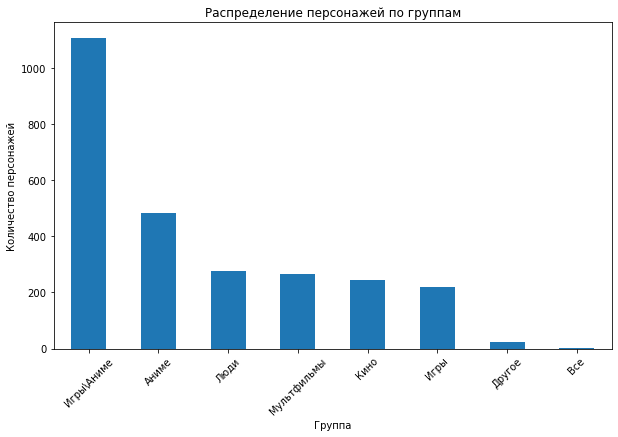

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
group_counts = df['group'].value_counts()
plt.figure(figsize=(10, 6))
group_counts.plot(kind='bar')
plt.title('Распределение персонажей по группам')
plt.xlabel('Группа')
plt.ylabel('Количество персонажей')
plt.xticks(rotation=45)
plt.show()

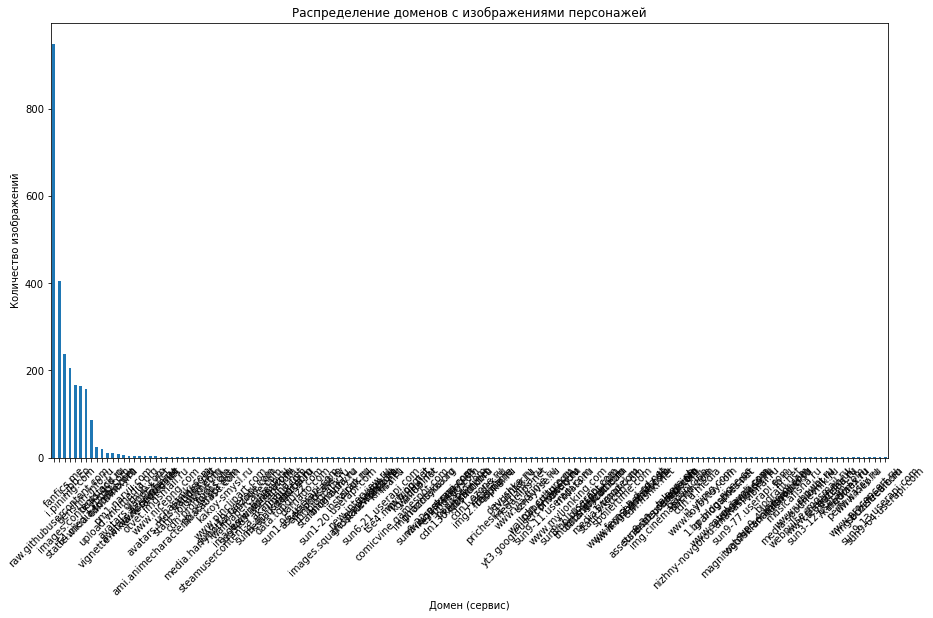

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.parse import urlparse
df['Domain'] = df['url'].apply(lambda x: urlparse(x).netloc)
domain_counts = df['Domain'].value_counts()
plt.figure(figsize=(15, 8))
domain_counts.plot(kind='bar')
plt.title('Распределение доменов с изображениями персонажей')
plt.xlabel('Домен (сервис)')
plt.ylabel('Количество изображений')
plt.xticks(rotation=45)
plt.show()
